# gocode

## G00/G01

In [ ]:
1.G00X_Y_Z_    :快速定位指令，_代表具体数值可以同时针对X轴Y轴Z轴移动，只快速定位，不切削加工，相当于快速的移动到那个点上去数值代表绝对位置
2.G01X_Y_Z_F_:直线差补  F指定进给速度mm/min

In [ ]:
%matplotlib inline

输入g00x10y20  和g01x10y20   1.如图一所示先运动到A点再运动到B点  2.如图二所示直接运动到B点

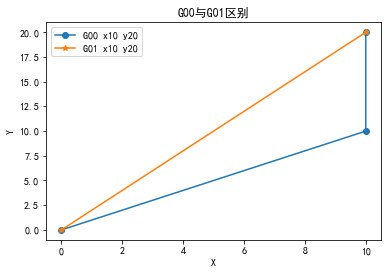

In [24]:
import matplotlib.pyplot as plt
from pylab import *         #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
#import numpy as np
#X轴，Y轴数据  
x = [0,10,10]  
y1 = [0,10,20] 
y2 = [0,20,20]  

plt.xlabel("X") #X轴标签  
plt.ylabel("Y")  #Y轴标签  
plt.title(u'G00与G01区别') #图标题  

plt.plot(x, y1, marker='o',label='G00 x10 y20')
plt.plot(x, y2, marker='*',label='G01 x10 y20')
plt.legend() # 显示图例

## GCode代码演示

下图所示是加工零件的轮廓ABCDE，

方式1：绝对坐标编程
```gcode
 //G92 设定机床坐标系与编程（工件）原点的关系并存储到寄存器中。
 //下面等同告诉当前刀尖在(-10,-10)位置(以编程（工件）原点来说)
G92 X-10 Y-10 
 //G90指令表示程序段中的编程尺寸按照绝对坐标给定，绝对坐标原点是编程（工件）原点
 //G17指令表示设定为XY坐标平面内的加工功能
 //G00指令表示快速定位指令，有的机床没有坐标联动功能，那会是两个坐标依次单独移动
N01 G90 G17 G00 X10 Y10  
 //G01指令是直线插补指令
N02 G01 X30 F100
 //G03,G02都是圆弧插补指令，G02是顺时针，G03是逆时针
N03 G03 X40 Y20 10 J-10
N04 G02 X30 Y30 10 J-10
N05 G01 X10 Y20
N06               Y10
```
方式2：相对坐标编程
```gcode
N01 G91  G17 X20 Y20  //G91指令表示程序中的编程尺寸按照相对坐标（相对前一个点）给定
N02 G01 X20 F100
N03 G03 X10  Y10  10 J-10
N04 G03 X-10 Y10  10 J-10
N05 G01 X-20 Y-10 
N06                Y-10
N07 G00 X-20 Y-10 M02
```

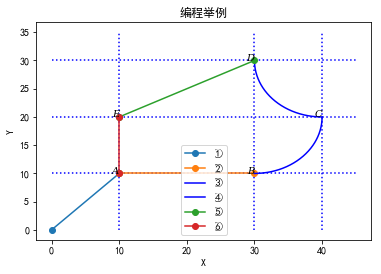

In [58]:
import math
import matplotlib.pyplot as plt
from pylab import *         #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
import numpy as np

#绘制单点
plt.text(10,10,'A', family='serif', style='italic', ha='right', wrap=True)
plt.text(30,10,'B', family='serif', style='italic', ha='right', wrap=True)
plt.text(40,20,'C', family='serif', style='italic', ha='right', wrap=True)
plt.text(30,30,'D', family='serif', style='italic', ha='right', wrap=True)
plt.text(10,20,'E', family='serif', style='italic', ha='right', wrap=True)

#绘制对齐线
plt.plot([0,45],[10,10],color='b',linestyle=':',markerfacecolor='r',markersize = 10)
plt.plot([0,45],[20,20],color='b',linestyle=':',markerfacecolor='r',markersize = 10)
plt.plot([0,45],[30,30],color='b',linestyle=':',markerfacecolor='r',markersize = 10)

plt.plot([10,10],[0,35],color='b',linestyle=':',markerfacecolor='r',markersize = 10)
plt.plot([30,30],[0,35],color='b',linestyle=':',markerfacecolor='r',markersize = 10)
plt.plot([40,40],[0,35],color='b',linestyle=':',markerfacecolor='r',markersize = 10)

#绘制线
plt.plot([0,10], [0,10], marker='o',label='①')
plt.plot([10,30], [10,10], marker='o',label='②')

#(x-a)²+(y-b)²=r²
#(x-30)²+(y-20)²=10²
x = np.linspace(30,40, 500)
y =  20- np.sqrt( 100 - (x-30)**2 )  
plt.plot(x, y, color='blue',label='③')

#(x-40)²+(y-30)²=10²
x = np.linspace(30,40, 500)
y =  30- np.sqrt( 100 - (x-40)**2 )  
plt.plot(x, y, color='blue',label='④')

plt.plot([30,10], [30,20], marker='o',label='⑤')
plt.plot([10,10], [20,10], marker='o',label='⑥')

plt.xlabel("X") #X轴标签  
plt.ylabel("Y")  #Y轴标签  
plt.title(u'编程举例') #图标题  

#l2, = plt.plot(x, y2, color='blue')

#plt.plot(x, y, marker='o',label='G00 x10 y20')
plt.legend() # 显示图例

## IJK原理

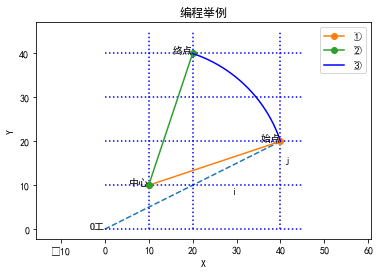

In [28]:
import math
import matplotlib.pyplot as plt
from pylab import *         #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
import numpy as np

plt.axis('equal')

#绘制单点
plt.text(0,0,u'O工',  style='italic', ha='right', wrap=True)
plt.text(10,10,u'中心',  style='italic', ha='right', wrap=True)
plt.text(40,20,u'始点',  style='italic', ha='right', wrap=True)
plt.text(20,40,u'终点',  style='italic', ha='right', wrap=True)
#绘制开始点的线
plt.plot([0,40], [0,20], linestyle='--')

#绘制对齐线
plt.plot([0,45],[0,0],color='b',linestyle=':',markerfacecolor='r',markersize = 10)
plt.plot([0,45],[10,10],color='b',linestyle=':',markerfacecolor='r',markersize = 10)
plt.plot([0,45],[20,20],color='b',linestyle=':',markerfacecolor='r',markersize = 10)
plt.plot([0,45],[30,30],color='b',linestyle=':',markerfacecolor='r',markersize = 10)
plt.plot([0,45],[40,40],color='b',linestyle=':',markerfacecolor='r',markersize = 10)

plt.plot([10,10],[0,45],color='b',linestyle=':',markerfacecolor='r',markersize = 10)
plt.plot([20,20],[0,45],color='b',linestyle=':',markerfacecolor='r',markersize = 10)
plt.plot([40,40],[0,45],color='b',linestyle=':',markerfacecolor='r',markersize = 10)

#绘制线
plt.plot([10,40], [10,20], marker='o',label='①')
plt.plot([10,20], [10,40], marker='o',label='②')

#(x-a)²+(y-b)²=r²
#(x-10)²+(y-10)²=1000
x = np.linspace(20,40, 500)
y =  10 + np.sqrt( 1000 - (x-10)**2 )  
plt.plot(x, y, color='blue',label='③')
plt.text(42,15,u'j',  style='italic', ha='right', wrap=True)
plt.text(30,8,u'i',  style='italic', ha='right', wrap=True)




plt.xlabel("X") #X轴标签  
plt.ylabel("Y")  #Y轴标签  
plt.title(u'编程举例') #图标题  

#l2, = plt.plot(x, y2, color='blue')

#plt.plot(x, y, marker='o',label='G00 x10 y20')
plt.legend() # 显示图例